In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Markdown as md
from pathlib import Path

In [2]:
# case_name = ''

# file_name = ''

# sheet_name_all = ''

# subheats_list = ''

case_name = 'Algorithmic_Trading_Case'

file_name = './Final_Resuts_from_RITC_2022'

sheet_name_all = 'AT'

subheats_list = ["AT-1","AT-2","AT-3","AT-4", "AT-5","AT-6","AT-7","AT-8","AT-9","AT-10"]

In [3]:
def df_User(df_DF_SUBHEATS, user):
    df = pd.DataFrame([list(pd.DataFrame(df_DF_SUBHEATS.loc[df_DF_SUBHEATS.loc[:,"User"]==user,].groupby(["Team2"])["NLV"].mean()).loc[:,"NLV"])])
    columns = list(pd.DataFrame(df_DF_SUBHEATS.loc[df_DF_SUBHEATS.loc[:,"User"]==user,].groupby(["Team2"])["NLV"].mean()).index)
    return df, columns

In [4]:
md(f"<font size = 5> Welcome to the analysis of the <b>{case_name}</b>!</font>")  

<font size = 5> Welcome to the analysis of the <b>Algorithmic_Trading_Case</b>!</font>

In [5]:
# import file
DF_ALL = pd.read_excel(f"{file_name}.xlsx", sheet_name=sheet_name_all)

In [6]:
cols = [i for i in list(DF_ALL.columns) if "Subheat" in i]

md(f"<font size = 4> In this case we have <b>{len(cols)}</b> Heats. </font>")  

<font size = 4> In this case we have <b>10</b> Heats. </font>

In [7]:
%%capture

# formatting the file to rmeove uneccesary columns
DF_ALL.loc[:,"Team2"] = DF_ALL["Team"].str[0:4]
DF_ALL = DF_ALL.loc[0:52,:]

# calculating basic descriptive statistics
DF_ALL.loc[:,"Mean"] = DF_ALL.loc[:,cols].mean(axis=1)
DF_ALL.loc[:,"Min"] = DF_ALL.loc[:,cols].min(axis=1)
DF_ALL.loc[:,"Max"] = DF_ALL.loc[:,cols].max(axis=1)

In [8]:
md(f"<font size = 4> We have calculated the Mean, Min, and Max for each Team of the university based on the Subheats. Check out the top 10:</font>")  

<font size = 4> We have calculated the Mean, Min, and Max for each Team of the university based on the Subheats. Check out the top 10:</font>

In [9]:
DF_ALL.head(10)

,Team,Subheat 1-1Details,Subheat 1-2Details,Subheat 1-3Details,Subheat 1-4Details,Subheat 1-5Details,Subheat 1-6Details,Subheat 1-7Details,Subheat 1-8Details,Subheat 1-9Details,Subheat 1-10Details,Heat 1,Rank,Score,Unnamed: 14,Team2,Mean,Min,Max
0,"RZQO - University of Warsaw, Faculty of Econom...",6,12,7,15,16.0,6.0,8.0,5.0,17.0,10.0,1.0,1.0,53.0,102.0,RZQO,10.2,5.0,17.0
1,KLYZ - University College Dublin - Team A,51,51,2,1,1.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,52.0,119.0,KLYZ,11.9,1,51
2,MUKW - Southwestern University of Finance and ...,1,9,10,10,42.0,2.0,3.0,7.0,47.0,7.0,3.0,3.0,51.0,138.0,MUKW,13.8,1,47.0
3,SZEI - Baruch College - Team B,3,21,16,13,3.0,16.0,4.0,37.0,5.0,21.0,4.0,4.0,50.0,139.0,SZEI,13.9,3,37.0
4,NCGQ - University of Calgary - Team B,8,24,4,42,15.0,11.0,11.0,35.0,2.0,9.0,5.0,5.0,49.0,161.0,NCGQ,16.1,2.0,42
5,IVPJ - Fairfield University - Team B,34,4,8,36,8.0,33.0,2.0,9.0,24.0,6.0,6.0,6.0,48.0,164.0,IVPJ,16.4,2.0,36
6,TCZM - Hong Kong University of Science and Tec...,2,3,21,43,9.0,7.0,27.0,15.0,14.0,34.0,7.0,7.0,47.0,175.0,TCZM,17.5,2,43
7,OCFZ - University of Calgary - Team A,15,17,14,11,18.0,14.0,26.0,3.0,43.0,17.0,8.0,8.0,46.0,178.0,OCFZ,17.8,3.0,43.0
8,FQAR - University of Ottawa,26,8,25,6,33.0,3.0,35.0,27.0,16.0,3.0,9.0,9.0,45.0,182.0,FQAR,18.2,3.0,35.0
9,XAQY - Fordham University - Team A,35,31,3,8,6.0,17.0,24.0,30.0,9.0,19.0,9.0,9.0,45.0,182.0,XAQY,18.2,3,35


In [10]:
md(f"<font size = 4> This plot presents for each team the important statistics for the <b>{case_name}</b></font>")  

<font size = 4> This plot presents for each team the important statistics for the <b>Algorithmic_Trading_Case</b></font>

In [11]:
md(f"<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>")  

<font size = 3> <b>Red Dot</b> - Final Rank of the Team</font>

In [12]:
md(f"<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all Subheats</font>")  

<font size = 3> <b>Blue Dot</b> -  Mean of the ranks based on all Subheats</font>

In [13]:
md(f"<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all Subheats</font>")  

<font size = 3> <b>Green shaded area</b> -  the range between the minimum and the maximum rank taken based on all Subheats</font>

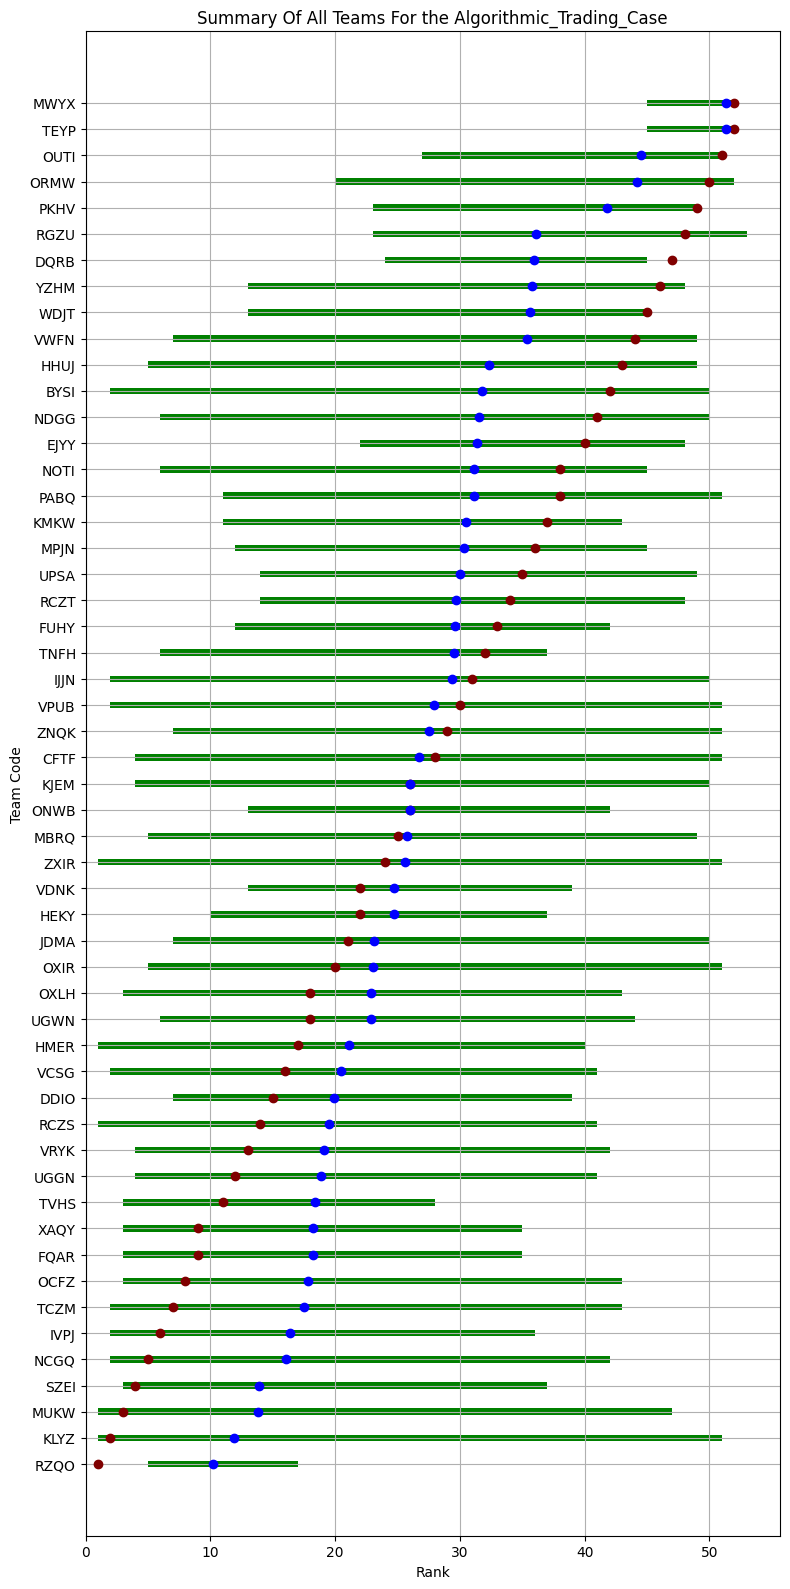

In [14]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111)

ax.plot(
    DF_ALL.loc[:,"Rank"],
    DF_ALL.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "maroon")

ax.plot(
    DF_ALL.loc[:,"Mean"],
    DF_ALL.loc[:,"Team2"],
    marker = "o",
    linestyle="",
    color = "blue")

ax.barh(
    DF_ALL.loc[:,"Team2"],
    DF_ALL.loc[:,"Min"],
    align='center',
    height=.25,
    color='white',
    label='min')

ax.barh(DF_ALL.loc[:,"Team2"],
        DF_ALL.loc[:,"Max"]-DF_ALL.loc[:,"Min"],
        align='center', 
        height=.25,
        left=DF_ALL.loc[:,"Min"],
        color='green',
        label='max')

ax.set_yticks(DF_ALL.loc[:,"Team2"])

ax.grid(True)
plt.title(f"Summary Of All Teams For the {case_name}")

plt.xlabel('Rank')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

### Import Each Heat 

In [15]:
md(f"<font size = 4> Now we are going to import the data for each Subheat of the <b>{case_name}</b>. That data presents the Net Liquidation Value (NLV) for each time. For reference, we know that we have <b>{len(cols)}</b> heats in this case.</font>")  

<font size = 4> Now we are going to import the data for each Subheat of the <b>Algorithmic_Trading_Case</b>. That data presents the Net Liquidation Value (NLV) for each time. For reference, we know that we have <b>10</b> heats in this case.</font>

In [16]:
md(f"<font size = 3> <b> Net Liquidation Value (NLV) </b> - Indicated the value of the security if the current position is closed immediately at the best bid (for Long Positions) or best ask (for Short Positions).</font>")  

<font size = 3> <b> Net Liquidation Value (NLV) </b> - Indicated the value of the security if the current position is closed immediately at the best bid (for Long Positions) or best ask (for Short Positions).</font>

In [17]:
# import each heat to get NLV for each team and concatenate each DataFrame
for i in subheats_list:
    if i == subheats_list[0]:
        DF_SUBHEATS = pd.read_excel(f"{file_name}.xlsx", sheet_name=i)
        DF_SUBHEATS.columns = DF_SUBHEATS.loc[0,:]
        DF_SUBHEATS = DF_SUBHEATS.loc[1:,:]
        DF_SUBHEATS.loc[:,"Heat"] = i
    else:
        DF_SUBHEATS_W = pd.read_excel(f"{file_name}.xlsx", sheet_name=i)
        
        DF_SUBHEATS_W.columns = DF_SUBHEATS_W.loc[0,:]
        DF_SUBHEATS_W = DF_SUBHEATS_W.loc[1:,:]
        
        DF_SUBHEATS_W.loc[:,"Heat"] = i
        DF_SUBHEATS = pd.concat([DF_SUBHEATS,DF_SUBHEATS_W])

# DF_SUBHEATS.columns = DF_SUBHEATS.columns.fillna('to_drop')
# DF_SUBHEATS = DF_SUBHEATS.drop(['Comment', 'Adjustment', 'to_drop'], axis=1)

DF_SUBHEATS = DF_SUBHEATS.drop(['Comment', 'Adjustment'], axis=1)

DF_SUBHEATS.loc[:,'NLV'] = DF_SUBHEATS.loc[:,'NLV'].astype('float')
DF_SUBHEATS.loc[:,"Team2"] = DF_SUBHEATS.loc[:,"Team"].str[0:4]

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

md(f"<font size = 4> In order to check if the data has been imported correctly we can do this in the folowing way: We know that we have {DF_SUBHEATS.loc[DF_SUBHEATS['Heat']==subheats_list[0], ['Team']].value_counts()[1]} Users and {len(np.unique(DF_SUBHEATS['Heat']))} Heats and we have {len(np.unique(DF_SUBHEATS['Team']))} teams so multiplying them gives us {DF_SUBHEATS.loc[DF_SUBHEATS['Heat']==subheats_list[0], ['Team']].value_counts()[1]*len(np.unique(DF_SUBHEATS['Heat']))*len(np.unique(DF_SUBHEATS['Team']))} which is the same as the number of rows in our dataframe = {len(DF_SUBHEATS)}. </font>")  

<font size = 4> In order to check if the data has been imported correctly we can do this in the folowing way: We know that we have 1 Users and 10 Heats and we have 53 teams so multiplying them gives us 530 which is the same as the number of rows in our dataframe = 530. </font>

In [19]:
md(f"<font size = 4> For reference, check out the first 10 rows:</font>")  

<font size = 4> For reference, check out the first 10 rows:</font>

In [20]:
DF_SUBHEATS.head(10)

,Team,User,NLV,Heat,Team2
1,MWYX - University of Illinois Urbana Champaign,3,-5000000.0,AT-1,MWYX
2,"TEYP - University of California, Los Angeles -...",1,-5000000.0,AT-1,TEYP
3,KLYZ - University College Dublin - Team A,4,-158816.0,AT-1,KLYZ
4,IJJN - Oklahoma State University,2,-82010.578125,AT-1,IJJN
5,"KJEM - Simon Fraser University, Beedie School ...",3,-52950.703125,AT-1,KJEM
6,"EJYY - Charles University, Institute of Econom...",1,-28465.191406,AT-1,EJYY
7,BYSI - University College Dublin - Team B,3,-22581.285156,AT-1,BYSI
8,"PKHV - Indian Institute of Management, Raipur",1,-14666.282227,AT-1,PKHV
9,OXIR - LUISS Guido Carli University of Rome - ...,1,-13398.657227,AT-1,OXIR
10,WDJT - University of Virginia,4,-9999.68457,AT-1,WDJT


In [21]:
DF_ALL_CASES = pd.read_excel(f'{file_name}.xlsx', sheet_name="finalrank")
best_teams = DF_ALL_CASES.loc[0:5,"Team"]

In [22]:
md(f"<font size = 4> Based on the data from all cases, the six top rank teams are:</font>")  

<font size = 4> Based on the data from all cases, the six top rank teams are:</font>

In [23]:
DF_BEST_TEAMS = pd.DataFrame(data={
    'Team Names': best_teams,
    'Team Codes': best_teams.str[0:4]
})

DF_BEST_TEAMS

,Team Names,Team Codes
0,SZEI - Baruch College - Team B,SZEI
1,DDIO - Baruch College - Team C,DDIO
2,FQAR - University of Ottawa,FQAR
3,VRYK - Baruch College - Team A,VRYK
4,NCGQ - University of Calgary - Team B,NCGQ
5,"RZQO - University of Warsaw, Faculty of Econom...",RZQO


In [24]:
md(f"<font size = 4> These are the top 10 rank team of the <b>{case_name}</b></font>")  

<font size = 4> These are the top 10 rank team of the <b>Algorithmic_Trading_Case</b></font>

In [25]:
data_ALGO = DF_SUBHEATS.pivot(index='Team2', columns='Heat', values='NLV').astype(int)
# data_ALGO = data_ALGO.astype(int)

help_ALGO = DF_ALL.loc[:,["Team2","Rank"]]
help_ALGO.index = help_ALGO.loc[:,"Team2"]
help_ALGO = help_ALGO.loc[:,"Rank"]

data_ALGO.loc[:,"Rank"] = help_ALGO.loc[data_ALGO.index]
data_ALGO.sort_values(by = ["Rank"]).head(10)

Heat,AT-1,AT-10,AT-2,AT-3,AT-4,AT-5,AT-6,AT-7,AT-8,AT-9,Rank
Team2,,,,,,,,,,,
RZQO,77187,67010,60115,73130,68541,54355,82649,71298,93425,51830,1.0
KLYZ,-158816,102986,-144622,90822,167357,183614,140434,151757,162500,67656,2.0
MUKW,197818,76414,71505,61077,75680,95,107863,113290,64517,-20599,3.0
SZEI,91490,40027,33288,36966,70234,87687,57657,111723,4372,75954,4.0
NCGQ,71073,68417,28327,87957,-16422,57149,66064,65394,9278,88832,5.0
IVPJ,11362,77462,98728,72834,12198,65311,22373,124140,53117,30989,6.0
TCZM,94074,21153,107109,32037,-20460,61868,79862,28261,39262,54013,7.0
OCFZ,50375,47438,41747,44276,73865,53777,61082,37246,108380,-8509,8.0
XAQY,9631,44781,14759,90361,79801,71984,57203,43856,20701,66526,9.0


In [26]:
md(f"<font size = 4> The six best teams presented above had the following rank in the <b>{case_name}</b></font>")  

<font size = 4> The six best teams presented above had the following rank in the <b>Algorithmic_Trading_Case</b></font>

In [27]:
data_ALGO.loc[best_teams.str[0:4]].sort_values(by='Rank')

Heat,AT-1,AT-10,AT-2,AT-3,AT-4,AT-5,AT-6,AT-7,AT-8,AT-9,Rank
Team2,,,,,,,,,,,
RZQO,77187,67010,60115,73130,68541,54355,82649,71298,93425,51830,1.0
SZEI,91490,40027,33288,36966,70234,87687,57657,111723,4372,75954,4.0
NCGQ,71073,68417,28327,87957,-16422,57149,66064,65394,9278,88832,5.0
FQAR,26801,93221,73717,25897,86475,20058,104348,13626,24290,52028,9.0
VRYK,-9383,15981,33511,44881,90646,75045,56159,48346,23627,82298,13.0
DDIO,42204,12875,51011,19668,63381,71785,62805,49418,32252,24621,15.0


In [28]:
md(f"<font size = 4> For refernce our team (RZQ0) had the following values: </font><br>")  

<font size = 4> For refernce our team (RZQ0) had the following values: </font><br>

In [29]:
data_ALGO[data_ALGO.index=='RZQO']


Heat,AT-1,AT-10,AT-2,AT-3,AT-4,AT-5,AT-6,AT-7,AT-8,AT-9,Rank
Team2,,,,,,,,,,,
RZQO,77187,67010,60115,73130,68541,54355,82649,71298,93425,51830,1.0


In [30]:
md(f"<font size = 4> We had the rank: <b>{data_ALGO[data_ALGO.index=='RZQO']['Rank'].values}</b></font><br>")  

<font size = 4> We had the rank: <b>[1.]</b></font><br>

In [31]:
md(f"<font size = 4> Lets check which team had the highest and lowest NLV in each Heat:</font><br>")  

<font size = 4> Lets check which team had the highest and lowest NLV in each Heat:</font><br>

In [32]:
heat_high = {}
heat_low = {}

for i in subheats_list:
    heat_high[i] = list(DF_SUBHEATS.loc[(DF_SUBHEATS['Heat'] == i) & (DF_SUBHEATS['NLV'] == max(DF_SUBHEATS.loc[DF_SUBHEATS['Heat'] == i, 'NLV'])) , 'Team2'])
    heat_low[i] = list(DF_SUBHEATS.loc[(DF_SUBHEATS['Heat'] == i) & (DF_SUBHEATS['NLV'] == min(DF_SUBHEATS.loc[DF_SUBHEATS['Heat'] == i, 'NLV'])) , 'Team2'])    

In [33]:
md(f"<font size = 4> Folowing have the highest NLV in each Heat:</font><br>")  

<font size = 4> Folowing have the highest NLV in each Heat:</font><br>

In [34]:
heat_high

{'AT-1': ['MUKW'],
 'AT-2': ['ZXIR'],
 'AT-3': ['RCZS'],
 'AT-4': ['KLYZ'],
 'AT-5': ['KLYZ'],
 'AT-6': ['KLYZ'],
 'AT-7': ['KLYZ'],
 'AT-8': ['KLYZ'],
 'AT-9': ['HMER'],
 'AT-10': ['ZXIR']}

In [35]:
md(f"<font size = 4> Folowing have the lowest NLV in each Heat:</font><br>")  

<font size = 4> Folowing have the lowest NLV in each Heat:</font><br>

In [36]:
heat_low

{'AT-1': ['MWYX', 'TEYP'],
 'AT-2': ['MWYX', 'TEYP'],
 'AT-3': ['MWYX', 'TEYP'],
 'AT-4': ['MWYX', 'TEYP'],
 'AT-5': ['MWYX', 'TEYP'],
 'AT-6': ['MWYX', 'TEYP'],
 'AT-7': ['MWYX', 'TEYP'],
 'AT-8': ['MWYX', 'TEYP'],
 'AT-9': ['MWYX', 'TEYP'],
 'AT-10': ['RGZU']}

In [37]:
# Clustering

In [38]:
md(f"<font size = 4> We are going to run KMeans Clustering in order to look for the similarity in the results between the participants.</font><br>")

<font size = 4> We are going to run KMeans Clustering in order to look for the similarity in the results between the participants.</font><br>

In [39]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init = 10).fit(data_ALGO)

In [40]:
md(f"<font size = 4> The follwing teams are in each in cluster:</font><br>")  

<font size = 4> The follwing teams are in each in cluster:</font><br>

In [41]:
dict_kmeans = {}

for i in kmeans.labels_:
    dict_kmeans[i] = data_ALGO.index[kmeans.labels_==i].values
    
pd.set_option('display.max_colwidth', None)

pd.DataFrame(data={
    'Cluster': dict_kmeans.keys(),
    'Teams': dict_kmeans.values()
}).sort_values(by='Cluster').reset_index(drop=True)

,Cluster,Teams
0,0,"[EJYY, ORMW, OUTI, PABQ, PKHV, RGZU, VWFN, ZNQK]"
1,1,"[MWYX, TEYP]"
2,2,"[BYSI, DQRB, FUHY, HHUJ, IJJN, KMKW, MBRQ, MPJN, NDGG, NOTI, ONWB, RCZT, TNFH, UPSA, VDNK, WDJT, YZHM, ZXIR]"
3,3,[KLYZ]
4,4,"[DDIO, FQAR, HEKY, HMER, IVPJ, JDMA, KJEM, MUKW, NCGQ, OCFZ, OXIR, OXLH, RCZS, RZQO, SZEI, TCZM, TVHS, UGGN, UGWN, VCSG, VPUB, VRYK, XAQY]"
5,5,[CFTF]


In [42]:
md(f"<font size = 4> We see the average NLV in each cluster based on the teams in each cluster: </font><br>")  

<font size = 4> We see the average NLV in each cluster based on the teams in each cluster: </font><br>

In [43]:
DF_CLUSTER_MEAN = pd.DataFrame({"1" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==1]),:].mean(0),
             "2" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==2]),:].mean(0),
             "3" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==3]),:].mean(0),
             "4" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==4]),:].mean(0),
             "5" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==5]),:].mean(0),
             "0" : data_ALGO.loc[list(data_ALGO.index[kmeans.labels_==0]),:].mean(0)})

DF_CLUSTER_MEAN

,1,2,3,4,5,0
Heat,,,,,,
AT-1,-5000000.0,13765.000000,-158816.0,44218.608696,83092.0,17527.750
AT-10,0.0,37712.888889,102986.0,40012.000000,78375.0,-2583.250
AT-2,-5000000.0,24268.055556,-144622.0,45830.956522,-17105.0,-41927.000
AT-3,-5000000.0,15479.333333,90822.0,41010.000000,-37234.0,-2725.375
AT-4,-5000000.0,149.277778,167357.0,62874.695652,-69483.0,19601.750
AT-5,-5000000.0,26054.500000,183614.0,51821.000000,20313.0,-36277.250
AT-6,-5000000.0,6508.500000,140434.0,58481.695652,87096.0,18804.000
AT-7,-5000000.0,23128.055556,151757.0,55163.304348,83753.0,-11653.750
AT-8,-5000000.0,21923.333333,162500.0,35914.304348,32519.0,8725.375


In [44]:
md(f"<font size = 4> This section will present the teams that were on the top 6 Rank of this case - <b>{case_name}</b></font><br>")  

<font size = 4> This section will present the teams that were on the top 6 Rank of this case - <b>Algorithmic_Trading_Case</b></font><br>

In [45]:
md(f"<font size = 4> The teams that are on the top <= 5 Rank in this case are: </b></font><br>")  

<font size = 4> The teams that are on the top <= 5 Rank in this case are: </b></font><br>

In [46]:
top5_case = DF_ALL.loc[DF_ALL.Rank<=5, "Team2"]
DF_SUBHEATS_top5 = DF_SUBHEATS.loc[DF_SUBHEATS["Team2"].isin(top5_case),:]
top5_case

0    RZQO
1    KLYZ
2    MUKW
3    SZEI
4    NCGQ
Name: Team2, dtype: object

In [50]:
%%capture 

DF_SUBHEATS_top5['Team2'] = pd.Categorical(DF_SUBHEATS_top5['Team2'], categories=top5_case, ordered=True)
DF_SUBHEATS_top5 = DF_SUBHEATS_top5.sort_values(by='Team2')

In [51]:
DF_SUBHEATS_top5_pivot = DF_SUBHEATS_top5.pivot(index='Team2', columns='Heat', values='NLV')
DF_SUBHEATS_top5_pivot['Sum'] = DF_SUBHEATS_top5_pivot.sum(axis=1)

In [52]:
md(f"<font size = 4> It can be visualized as: </b></font><br>")  

<font size = 4> It can be visualized as: </b></font><br>

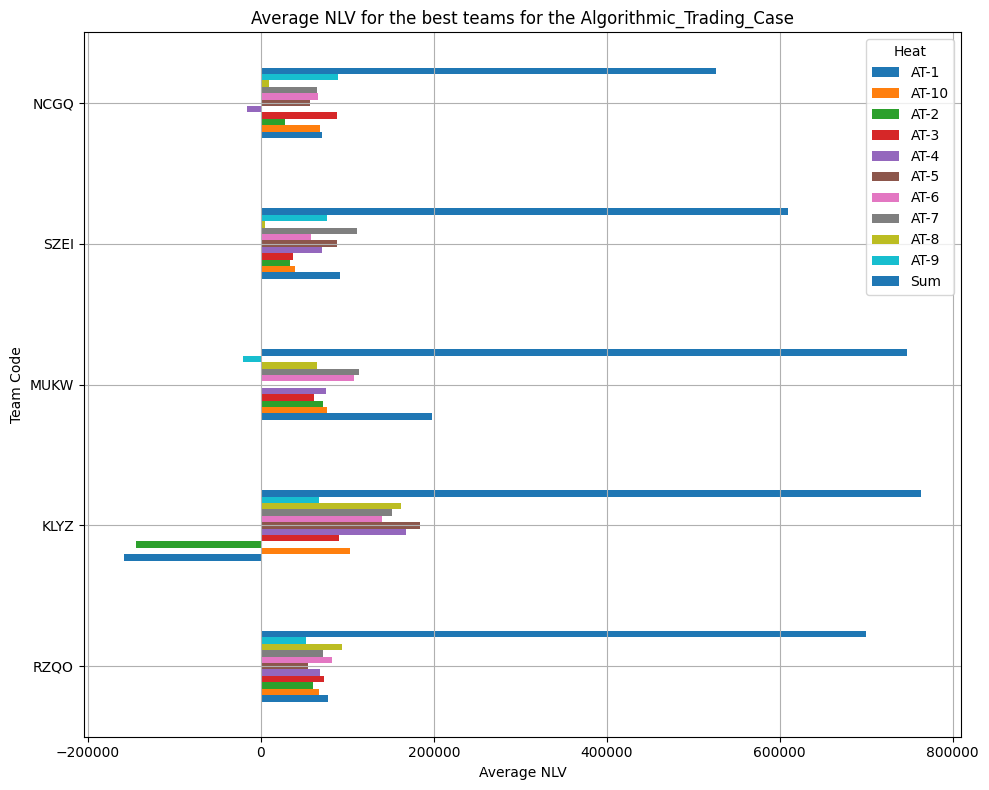

In [53]:
DF_SUBHEATS_top5_pivot.plot.barh(figsize=(10,8))

plt.grid(True)
plt.title(f"Average NLV for the best teams for the {case_name}")

plt.xlabel('Average NLV')
plt.ylabel('Team Code')

plt.tight_layout()
plt.show()

### Average results in each round

In [54]:
DF_SUBHEATS_top5_pivot.astype(int)

Heat,AT-1,AT-10,AT-2,AT-3,AT-4,AT-5,AT-6,AT-7,AT-8,AT-9,Sum
Team2,,,,,,,,,,,
RZQO,77187,67010,60115,73130,68541,54355,82649,71298,93425,51830,699544
KLYZ,-158816,102986,-144622,90822,167357,183614,140434,151757,162500,67656,763691
MUKW,197818,76414,71505,61077,75680,95,107863,113290,64517,-20599,747663
SZEI,91490,40027,33288,36966,70234,87687,57657,111723,4372,75954,609402
NCGQ,71073,68417,28327,87957,-16422,57149,66064,65394,9278,88832,526073


In [61]:
DF_SUBHEATS_RZQO_mean = pd.DataFrame(DF_SUBHEATS.loc[DF_SUBHEATS['Team2']=='RZQO'].groupby(['Team2', 'Heat'])['NLV'].mean())

DF_SUBHEATS_RZQO_mean["Team2"] = [ind[0] for ind in DF_SUBHEATS_RZQO_mean.index]
DF_SUBHEATS_RZQO_mean["Heat"] = [ind[1] for ind in DF_SUBHEATS_RZQO_mean.index]

DF_SUBHEATS_RZQO_mean_pivot = DF_SUBHEATS_RZQO_mean.pivot(index='Team2', columns='Heat', values='NLV').astype(int)
DF_SUBHEATS_RZQO_mean_pivot

Heat,AT-1,AT-10,AT-2,AT-3,AT-4,AT-5,AT-6,AT-7,AT-8,AT-9
Team2,,,,,,,,,,
RZQO,77187,67010,60115,73130,68541,54355,82649,71298,93425,51830


In [62]:
md(f"<font size = 4> It can be visualized as: </b></font><br>")  

<font size = 4> It can be visualized as: </b></font><br>

In [63]:
DF_SUBHEATS_top5_pivot = DF_SUBHEATS_top5_pivot[['AT-1', 'AT-2', 'AT-3', 'AT-4', 'AT-5', 'AT-6', 'AT-7', 'AT-8', 'AT-9', 'AT-10']]

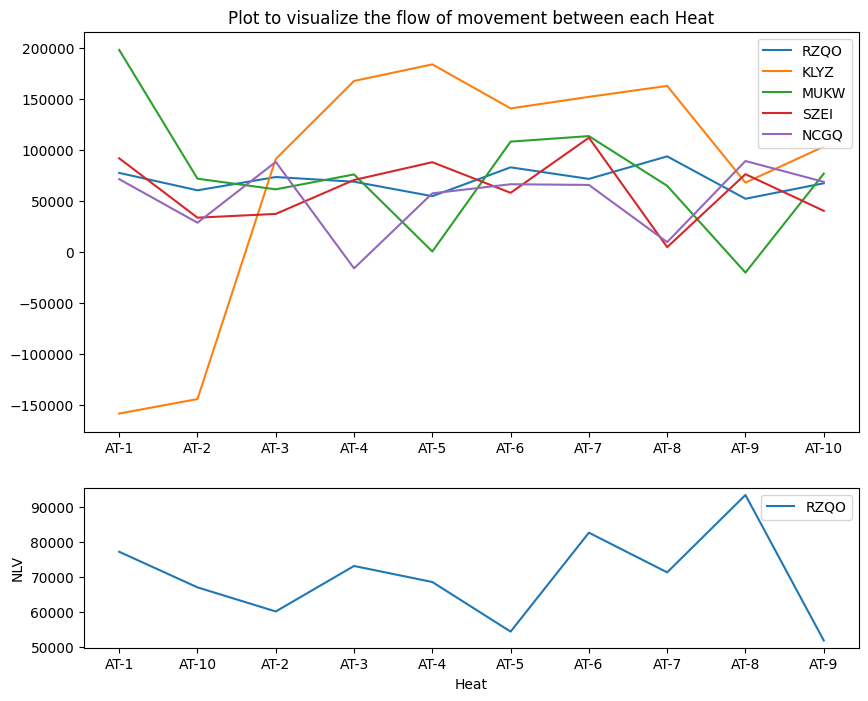

In [66]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), gridspec_kw={'height_ratios': [5, 2]})

for team in DF_SUBHEATS_top5_pivot.index:
    ax1.plot(DF_SUBHEATS_top5_pivot.columns, DF_SUBHEATS_top5_pivot.loc[team].values, label=team)

ax2.plot(DF_SUBHEATS_RZQO_mean_pivot.columns, DF_SUBHEATS_RZQO_mean_pivot.loc['RZQO'].values, label='RZQO')


plt.xlabel('Heat')
plt.ylabel('NLV')

ax1.set_title('Plot to visualize the flow of movement between each Heat')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

### Simulation with DF_ALL

In [59]:
# UNDERSTAND THIS

In [ ]:
for place in range(1, 20):
    DF_ALL_NEW = DF_ALL.copy()
    DF_ALL_NEW = DF_ALL_NEW.loc[~DF_ALL_NEW["Team"].str.contains("RZQO"),:] # Removing WNE
    
    subheats = DF_ALL_NEW.columns[DF_ALL_NEW.columns.str.contains("Details")] # Getting the Subheats
    # zeby zalatac dziurę po usunieciu WWA
    DF_ALL_NEW[subheats] = DF_ALL_NEW[subheats].rank()
    
    for subheat in subheats:
        DF_ALL_NEW.loc[DF_ALL_NEW[subheat]>=place, subheat] +=1
    
    DF_ALL_NEW["Mean"] = DF_ALL_NEW[subheats].mean(axis = 1)
    
    print(place, DF_ALL_NEW.loc[1,"Mean"]>=place)
    
    if ~(DF_ALL_NEW.loc[1,"Mean"]>=place):
        break